# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [2]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [3]:
def imageGenerator(x1, x2, y1, y2, upsampled=False, bspline=False,
                   mask=False, artefact=False):
    if upsampled:
        image = np.zeros([1000, 1000], np.float32)
    elif mask:
        image = np.zeros([100, 100], np.uint8)
    else:
        image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            if bspline:
                y += x
                if x > 99 or y > 99:
                    pass
                else:
                    image[x, y] = 1
            else:
                image[x, y] = 1
    if artefact:
        image[:, -10:] = 1
    image = itk.image_view_from_array(image)
    return image

In [3]:
def imageGeneratorBspline(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            y += x 
            if x>99 or y>99:
                pass
            else:
                image[x, y] = 1
    return itk.image_view_from_array(image)

In [4]:
def imageGeneratorLarge(x1, x2, y1, y2):
    image = np.zeros([1000, 1000], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            image[x, y] = 1
    return itk.image_view_from_array(image)

In [5]:
def maskGenerator(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.uint8)
    for x in range(x1, x2):
        for y in range(y1, y2):
            image[x, y] = 1
    return itk.image_view_from_array(image)

## Rigid Test

In [4]:
# Create rigid transformed test images
fixed_image = imageGenerator(25,75,25,75)
moving_image = imageGenerator(1,51,10,60)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

In [5]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Rigid Test

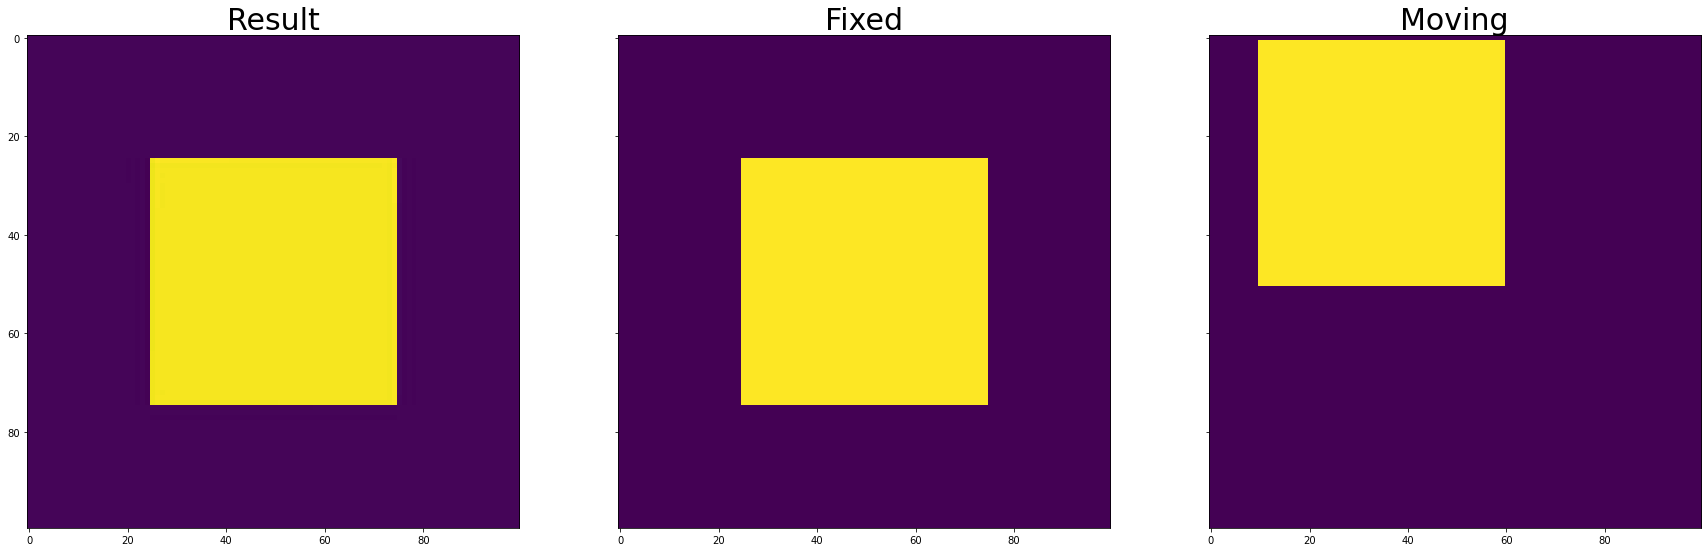

In [6]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image)
axs[2].set_title('Moving', fontsize=30)
plt.show()

## Affine Test

In [7]:
# Create test images
fixed_image_affine = imageGenerator(25,75,25,75)
moving_image_affine = imageGenerator(1,71,1,91)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine',4)
parameter_object.AddParameterMap(default_affine_parameter_map)

In [8]:
# Call registration function
result_image_affine, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_affine, moving_image_affine,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Affine Test

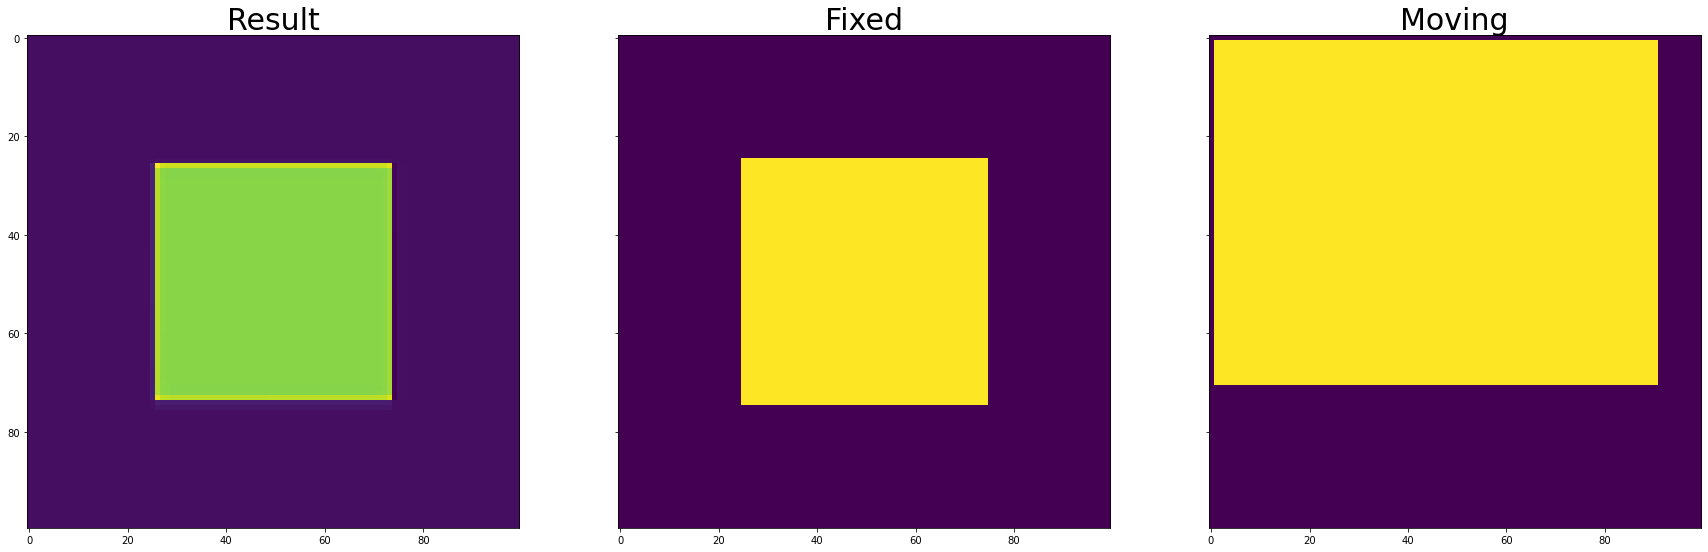

In [9]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_affine)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_affine)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_affine)
axs[2].set_title('Moving', fontsize=30)
plt.show()

## Bspline Test

In [10]:
# Create test images
fixed_image_bspline = imageGenerator(25,65,25,65)
moving_image_bspline = imageGenerator(5,55,5,40, bspline=True)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine')
parameter_object.AddParameterMap(default_affine_parameter_map)
default_bspline_parameter_map = parameter_object.GetDefaultParameterMap('bspline')
parameter_object.AddParameterMap(default_bspline_parameter_map)

In [11]:
# Call registration function
result_image_bspline, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_bspline, moving_image_bspline,
    parameter_object=parameter_object,
    log_to_console=True)

### Bspline Test Transformix

In [12]:
# Load Transformix Object
transformix_object = itk.TransformixFilter.New()
transformix_object.SetMovingImage(moving_image_bspline)
transformix_object.SetTransformParameterObject(result_transform_parameters)

# Update object (required)
transformix_object.UpdateLargestPossibleRegion()

# Results of Transformation
result_image_transformix = transformix_object.GetOutput()


### Bspline Test Visualization

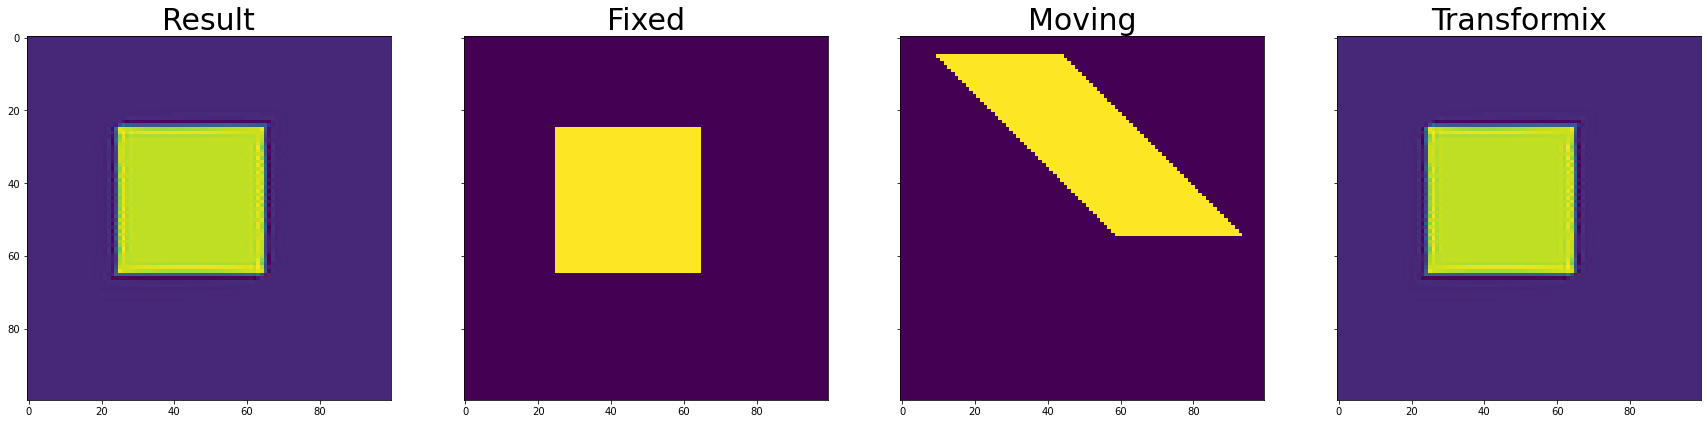

In [13]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,4, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_bspline)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_bspline)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_bspline)
axs[2].set_title('Moving', fontsize=30)
axs[3].imshow(result_image_transformix)
axs[3].set_title('Transformix', fontsize=30)
plt.show()

### Masked Registration Test

In [14]:
# Create rigid transformed test images with artefact
fixed_image = imageGenerator(25, 75, 25, 75, artefact=True)
moving_image = imageGenerator(1, 51, 10, 60, artefact=True)

# Create mask for artefact
fixed_mask = imageGenerator(0, 100, 0, 90, mask=True)
moving_mask = imageGenerator(0, 100, 0, 90, mask=True)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    fixed_mask=fixed_mask,
    moving_mask=moving_mask,
    parameter_object=parameter_object)

### Masked Registration Test Visualization

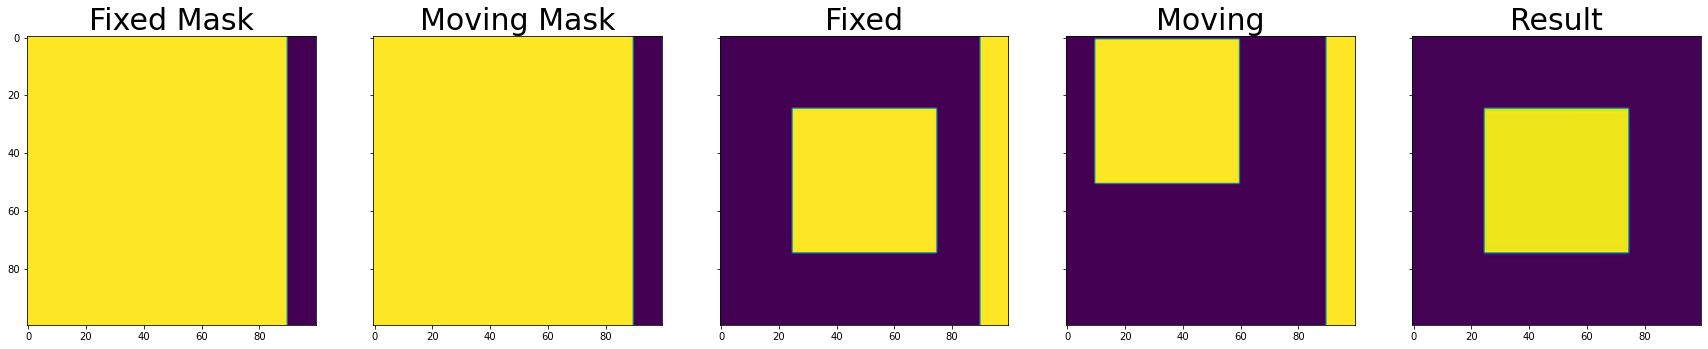

In [15]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,5, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(fixed_mask)
axs[0].set_title('Fixed Mask', fontsize=30)
axs[1].imshow(moving_mask)
axs[1].set_title('Moving Mask', fontsize=30)
axs[2].imshow(fixed_image)
axs[2].set_title('Fixed', fontsize=30)
axs[3].imshow(moving_image)
axs[3].set_title('Moving', fontsize=30)
axs[4].imshow(result_image)
axs[4].set_title('Result', fontsize=30)
plt.show()

### Groupwise Registration Test

In [19]:
# Create a vector of images for a 2D+time example in numpy
vector_of_images = np.zeros([6, 100, 100], np.float32)
i = 0
for x in range(0, 30, 5):
    image = imageGenerator(x, x+50, x, x+50)
    vector_of_images[i] = image
    i += 1

vector_itk = itk.image_view_from_array(vector_of_images)

# Create Groupwise Parameter Object
parameter_object = itk.ParameterObject.New()
groupwise_parameter_map = parameter_object.GetDefaultParameterMap('groupwise')
parameter_object.AddParameterMap(groupwise_parameter_map)

result_image, result_transform_parameters = itk.elastix_registration_method(
    vector_itk, vector_itk,
    parameter_object=parameter_object,
    log_to_console=True)

### Groupwise Registration Test Visualization (to be continued...)

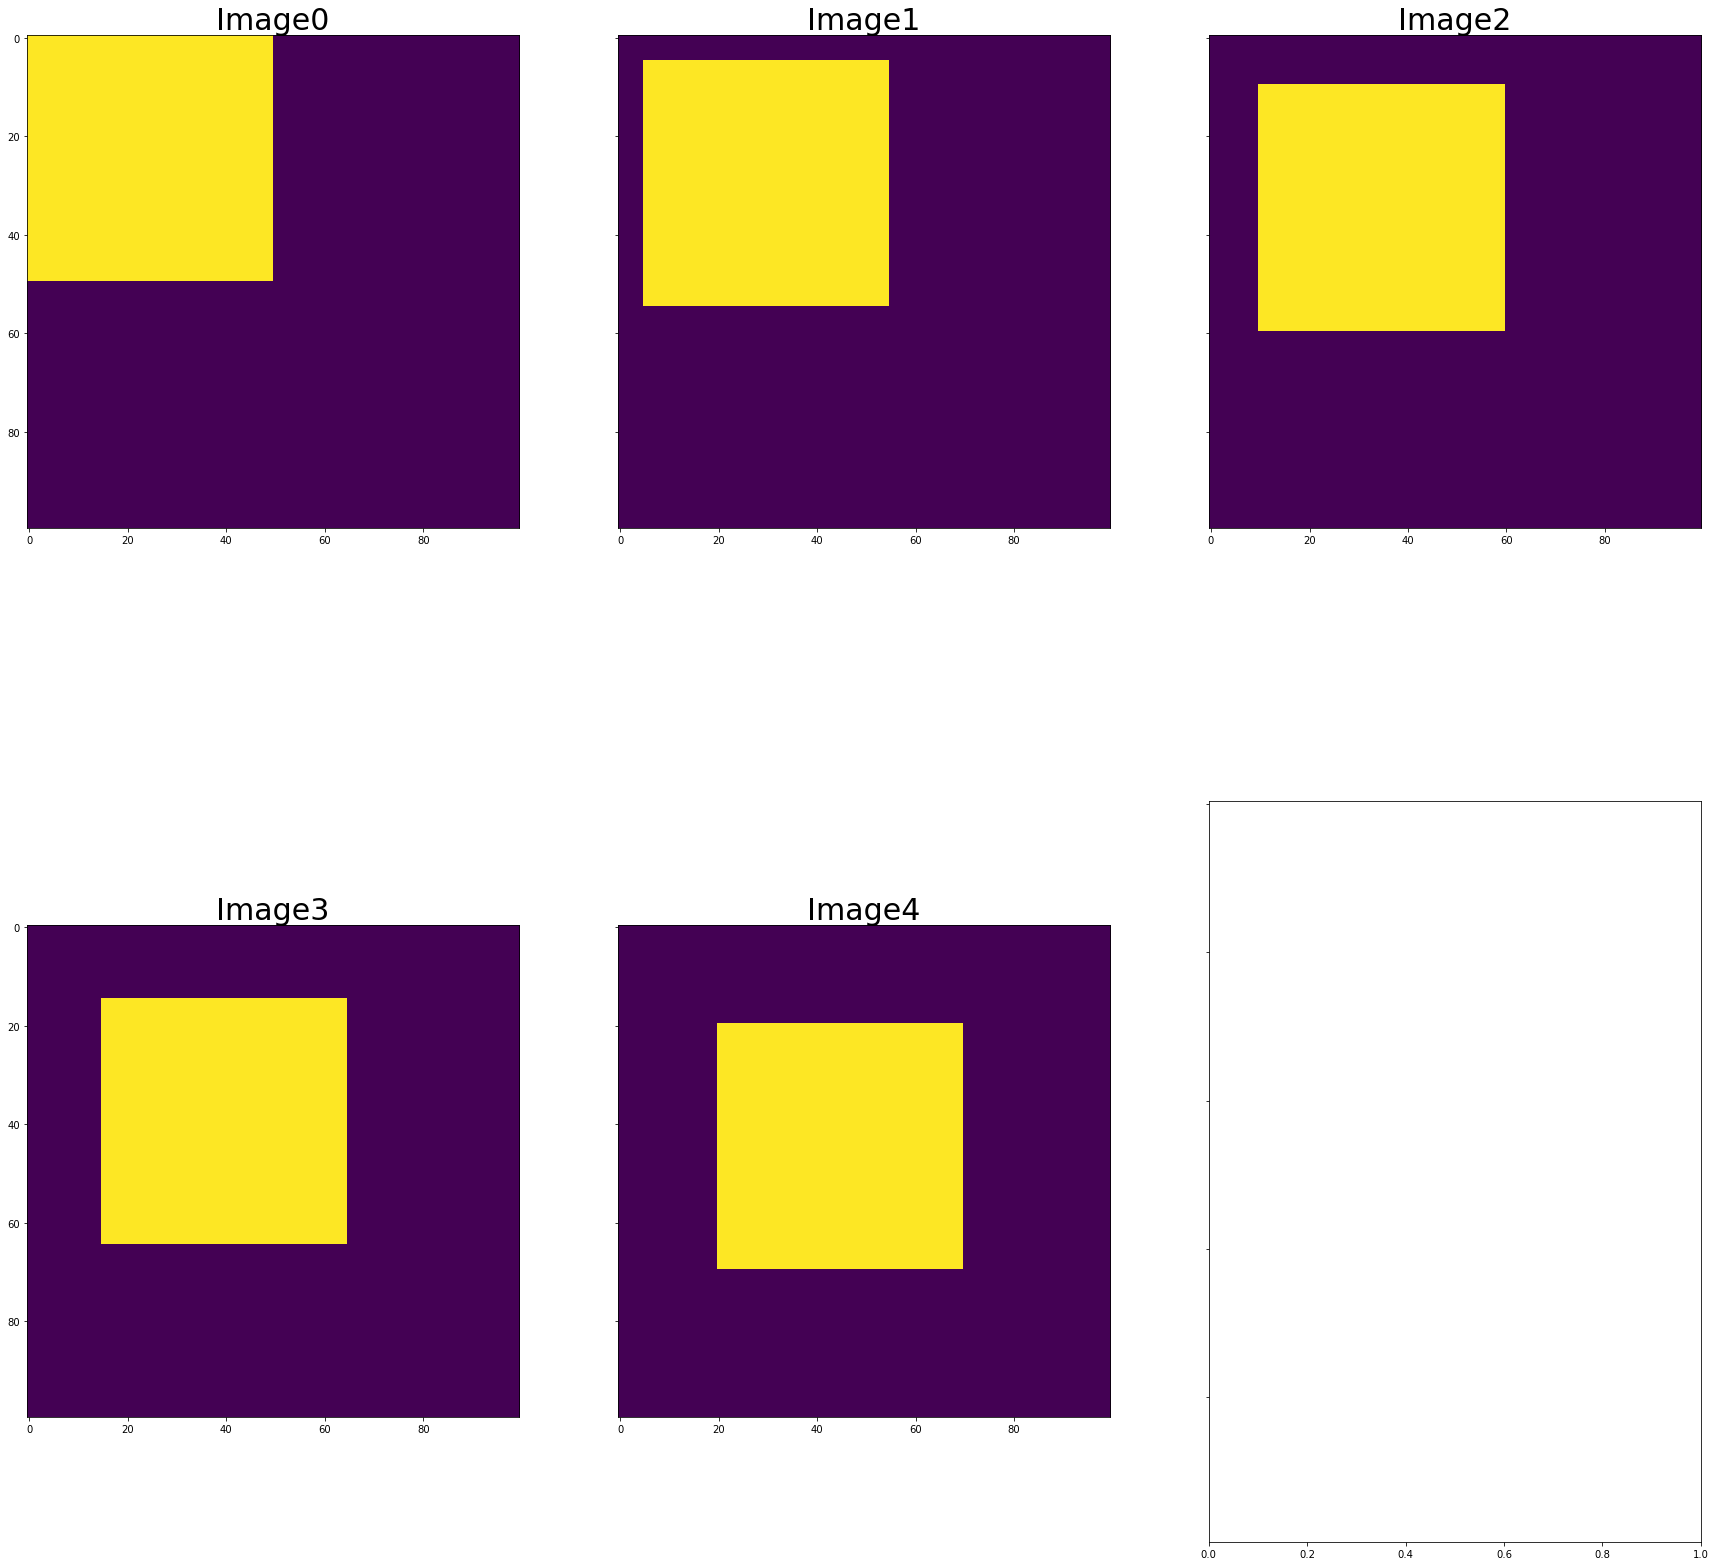

In [22]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(2,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0,0].imshow(vector_of_images[0])
axs[0,0].set_title('Image0', fontsize=30)
axs[0,1].imshow(vector_of_images[1])
axs[0,1].set_title('Image1', fontsize=30)
axs[0,2].imshow(vector_of_images[2])
axs[0,2].set_title('Image2', fontsize=30)
axs[1,0].imshow(vector_of_images[3])
axs[1,0].set_title('Image3', fontsize=30)
axs[1,1].imshow(vector_of_images[4])
axs[1,1].set_title('Image4', fontsize=30)
# axs[1,2].imshow(result_image)
# axs[1,2].set_title('Result', fontsize=30)
plt.show()

## Size transformation test
See example 12 for more explanation

In [16]:
# Create small images for registration
fixed_image_small = imageGenerator(25,75,25,75)
fixed_image_small.SetSpacing([10,10])
moving_image_small = imageGenerator(0,50,10,60)
moving_image_small.SetSpacing([10,10])

# .. and a big moving image for transformation
moving_image_large = imageGenerator(0,500,100,600, upsampled=True)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid',4)
parameter_object.AddParameterMap(default_rigid_parameter_map)

# Call elastix
result_image_small, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_small, moving_image_small,
    parameter_object=parameter_object)

# Adjust parameter file with spacing and size of large image.
result_transform_parameters.SetParameter("Size", ['1000', '1000'])
result_transform_parameters.SetParameter("Spacing", ['1', '1'])

# Call transformix with procedural method
# Procedural method gives wrong result image
# result_image_large = itk.transformix_filter(
#     moving_image=moving_image_large,
#     transform_parameter_object=result_transform_parameters,
#     log_to_console=True)

# Load Transformix Object
transformix_object = itk.TransformixFilter.New()
transformix_object.SetMovingImage(moving_image_large)
transformix_object.SetTransformParameterObject(result_transform_parameters)

# Update object (required)
transformix_object.UpdateLargestPossibleRegion()

# Results of Transformation
result_image_large = transformix_object.GetOutput()

## Size transformation test visualization


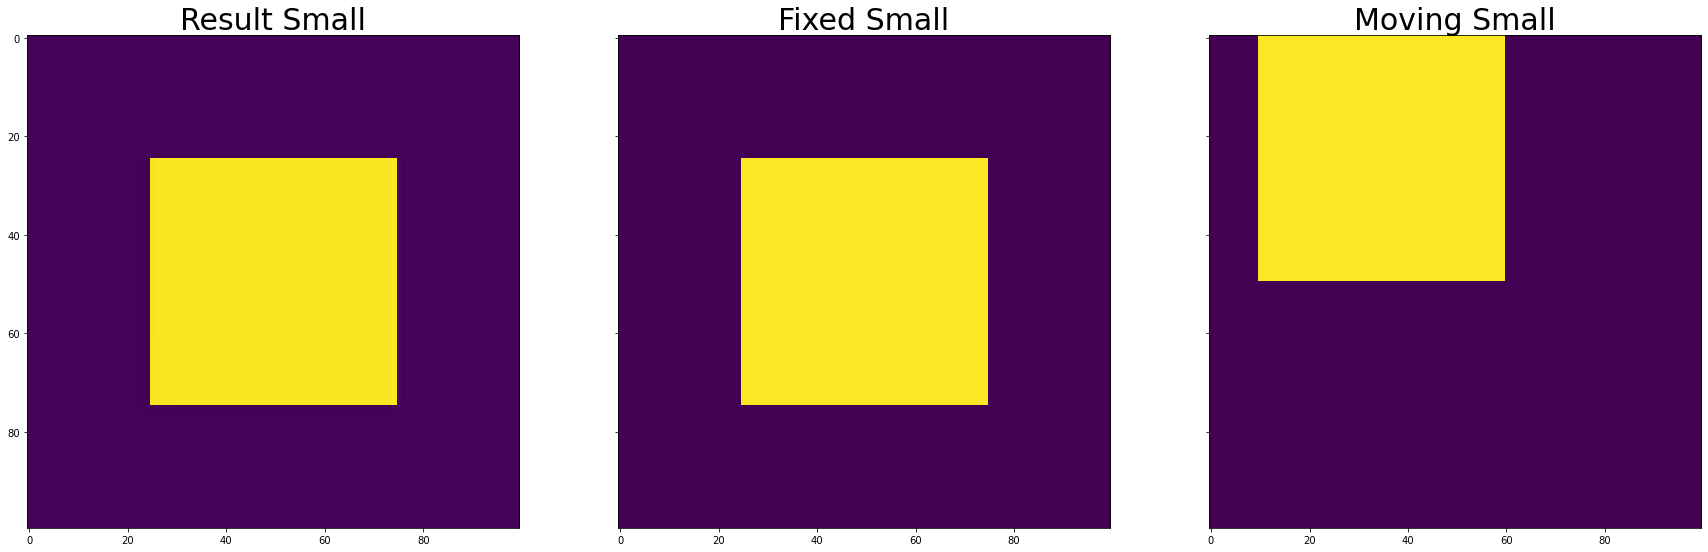

In [17]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_small)
axs[0].set_title('Result Small', fontsize=30)
axs[1].imshow(fixed_image_small)
axs[1].set_title('Fixed Small', fontsize=30)
axs[2].imshow(moving_image_small)
axs[2].set_title('Moving Small', fontsize=30)
plt.show()

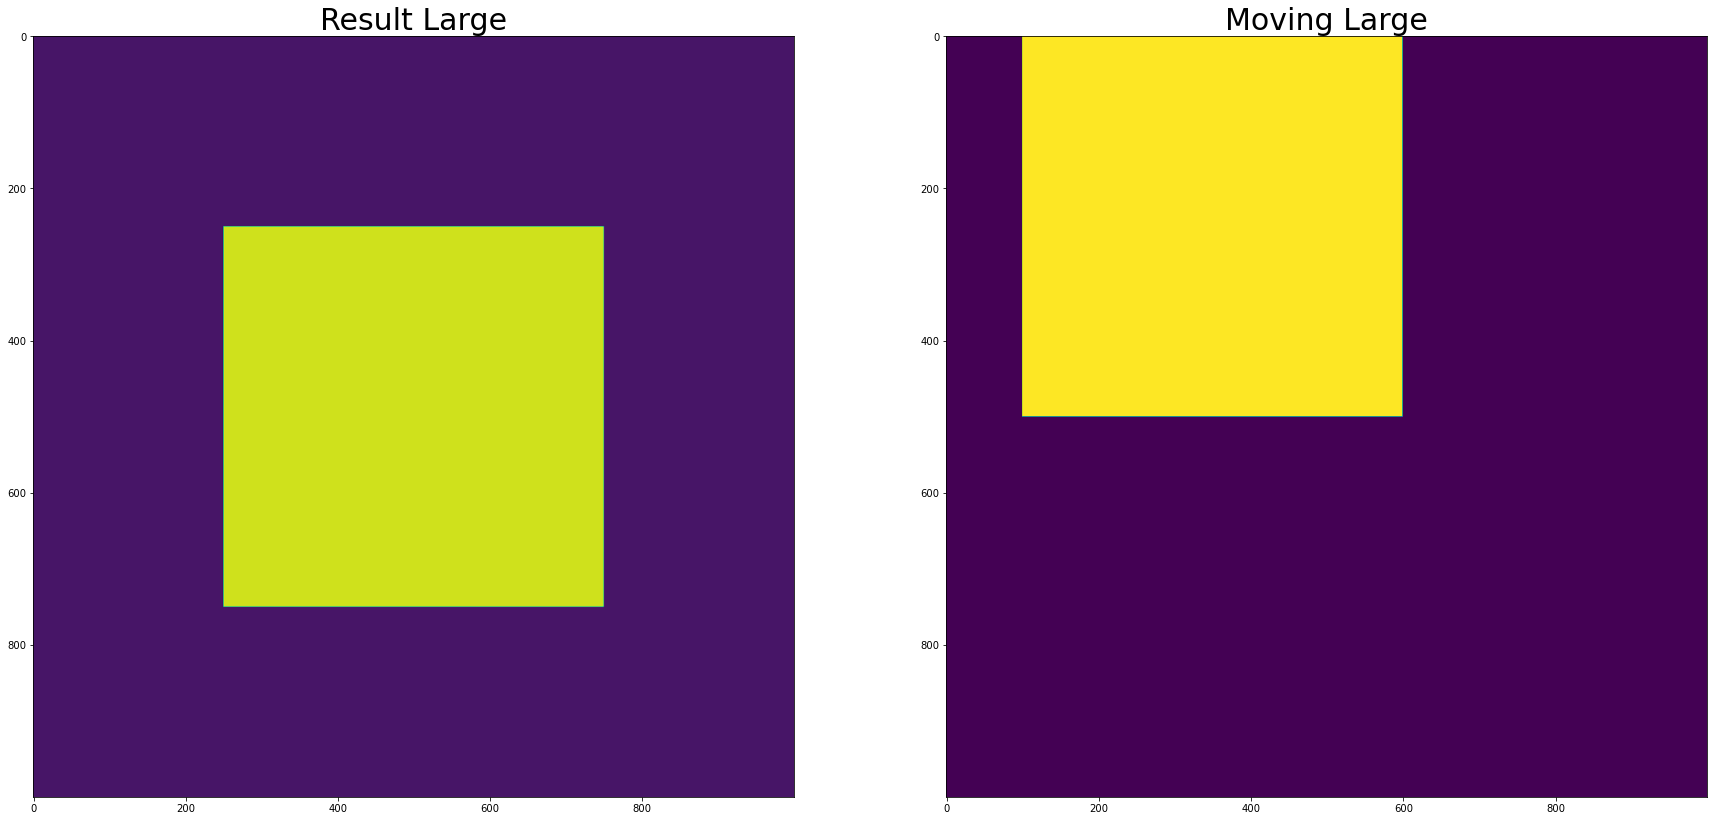

In [18]:
fig, axs = plt.subplots(1,2, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_large)
axs[0].set_title('Result Large', fontsize=30)
axs[1].imshow(moving_image_large)
axs[1].set_title('Moving Large', fontsize=30)
plt.show()